In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

## Data Exploratory

In [2]:
tweets=pd.read_csv('Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweets.shape

(14640, 15)

In [4]:
list(tweets.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [5]:
#check null value
(len(tweets)-tweets.count())/len(tweets)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

###### columns with majority of null values are dropped

In [6]:
Tweets=tweets.drop(['airline_sentiment_gold','negativereason_gold','name','retweet_count','tweet_coord','tweet_location','user_timezone'],axis=1)

In [7]:
Tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [8]:
#check overall sentiment
sentiment=Tweets.airline_sentiment.value_counts()
sentiment

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
#Adjust the figure size
sns.set()
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


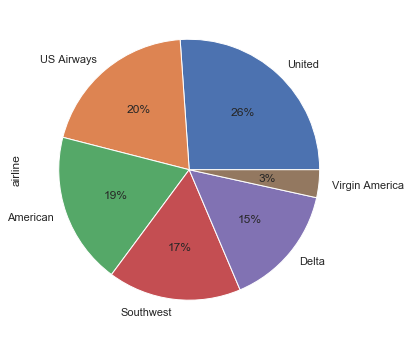

In [10]:
Tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

##### United has the most tweets and Virgin America has the least

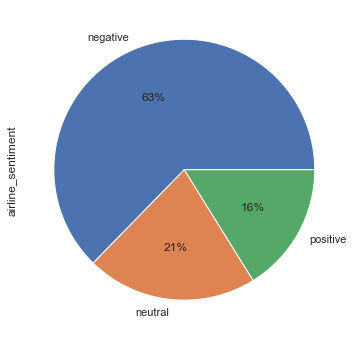

In [11]:
Tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

###### Over half of the overall tweets is negative sentiment

In [12]:
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [13]:
def ecdf(data):
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

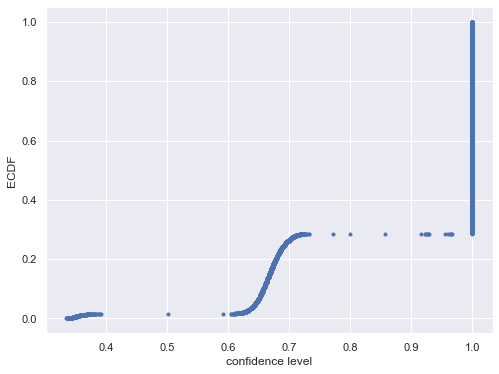

In [14]:
# Compute ECDF for sentiment confidence
x_score, y_score = ecdf(Tweets.airline_sentiment_confidence)

# Generate plot
_ = plt.plot(x_score, y_score, marker='.', linestyle='none')
_ = plt.xlabel('confidence level')
_ = plt.ylabel('ECDF')
plt.show()

The chance of sentiment confidence score being less than 1.0 is about 30 percent

In [15]:
by_airline=Tweets.groupby('airline')

In [16]:
# check sentiment by airlines
count_by_sentiment=by_airline['airline_sentiment'].value_counts()
print(count_by_sentiment)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64


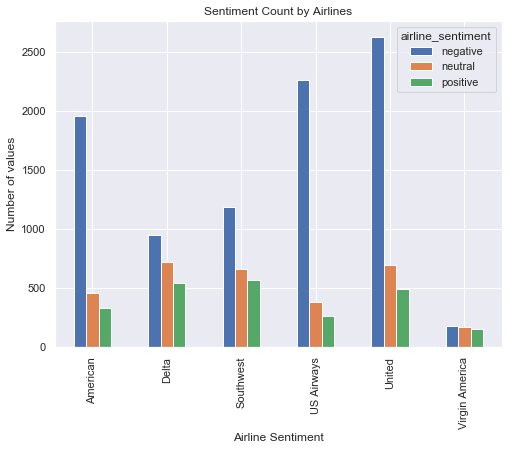

In [17]:
airline_sentiment = Tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.title('Sentiment Count by Airlines')
plt.ylabel('Number of values', fontsize=12)
plt.xlabel('Airline Sentiment', fontsize=12)
plt.show()

###### From the bar plot we can see that United has the most tweets and the highest negative sentiment percentage. Virgin has relavent small data set but similar sentiment distributions

## Data Cleaning

In [18]:
features=Tweets.iloc[:,6]
labels=Tweets.iloc[:,1]

In [19]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    #processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [20]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
#only use the max 2500 most frequently occuring words to create a bag of words
#use words that shows in at least 7 documents
#use words that occur in at most 80 percent of the documents, words show in all documents are not useful for classfication
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Prediction and Model Evaluation

###### First we apply Random Forest algorithm, owing to its ability to act upon non-normalized data

In [22]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
predictions=text_classifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [25]:
print("The accuracy score of random forrest is:",accuracy_score(y_test, predictions) )

The accuracy score of random forrest is: 0.7599043715846995


##### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [27]:
print("The accuracy score of logistic regression is:",accuracy_score(y_test, LR_pred))

The accuracy score of logistic regression is: 0.7793715846994536


##### Support Vector Machines

In [28]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
SVM.predict(X_test)
print("The accuracy score of SVM is:",round(SVM.score(X_test,y_test), 4))

The accuracy score of SVM is: 0.7814


##### K-Nearest Neighbors 
no assumption required for underlying data

In [29]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
KNN_pred = KNN.predict(X_test)

In [ ]:
print("The accuracy score of KNN is:",accuracy_score(y_test, KNN_pred))

In [ ]:
#df['counts'] = df.groupby(['Customer'])['Product ID'].transform('count')